## 향후 판매량 예측
- https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales
- 경진대회명 : 향후 판매량 예측 경진대회
- 미션 : 2013년 1월부터 2015년 10월까지 판매 데이터를 기반으로 2015년 11월 판매량 예측
- 문제 유형 : 회귀
- 평가지표 : RMSE

### 데이터 파일
- sales_train : 2013년 1월부터 2015년 10월까지 일별 판매 내역
- shops : 상점에 관한 추가 정보
- items : 상품에 관한 추가 정보
- item_categories : 상품분류에 관한 추가 정보
- test : 테스트 데이터(2015년 11월 각 상점의 상품 별 월간 판매량을 예측해야 함)
- sample_submission : 샘플 제출 파일

- 각 상점의 상품 별 월간 판매량(타깃값)은 0개에서 20개 사이어야 함
- 월간 판매량이 20개보다 많으면 20개로 간주, 음수도 허용하지 않음
- 타깃값뿐만 아니라 판매량과 관련된 피처는 모두 0에서 20 사이로 값을 제한해야 함

### 9.2 탐색적 데이터 분석
#### 9.2.1 데이터 둘러보기

In [3]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

##### sales_train 데이터

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


- date : 일.월.연도 순 
- date_block_num : 월 순번, ex. 2013년 1월은 0, 2월은 1 ...
- 월별 판매량을 구하는 것이므로 date_block_num으로 date 대체 가능. date 피처 제거

- item_cnt_day는 당일 판매량을 나타내는데, 타깃값은 월별 판매량(item_cnt_month)임
- 따라서 각 상점의 상품 별 일일 판매량을 월별로 합쳐 상점의 상품 별 월간 판매량을 구해야 함

In [8]:
sales_train.info(show_counts = True) # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


##### shops 데이터

In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
shops.info() # 60개의 상점 데이터, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


##### items 데이터

In [12]:
items.head() # item_name은 피처 제거 고려

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [13]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


##### item_categories 데이터

In [14]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [15]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


##### 테스트 데이터
- 테스트 데이터의 식별자인 ID, 상점ID, 상품ID로 구성

In [16]:
test.head() 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


##### 데이터 병합
- sales_train, shops, items, item_categories 데이터를 특정 피처 기준으로 병합

In [17]:
train = sales_train.merge(shops, on = 'shop_id', how = 'left') # left join과 유사
train = train.merge(items, on = 'item_id', how = 'left')
train = train.merge(item_categories, on = 'item_category_id', how = 'left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


##### 피처 요약표 만들기

In [18]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values

    return summary

resumetable(train)

데이터셋 형상 : (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


- shop_id, shop_name : 고윳값 개수 동일, 1:1로 매핑
- item_category_id, item_category_name : 고윳값 개수 동일, 1:1로 매핑
- id와 name 중 하나의 피처만 사용해도 될 것으로 예상

#### 9.2.2 데이터 시각화
##### 일별 판매량

<AxesSubplot:ylabel='item_cnt_day'>

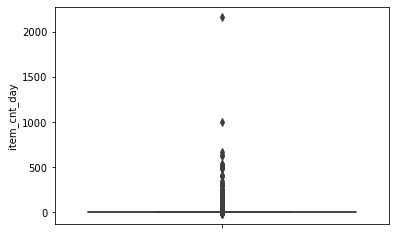

In [19]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y = 'item_cnt_day', data = train)

- 이상치가 많아 일반적인 박스플롯의 모양이 아님. 이상치 제거 필요

##### 판매가(상품 가격)

<AxesSubplot:ylabel='item_price'>

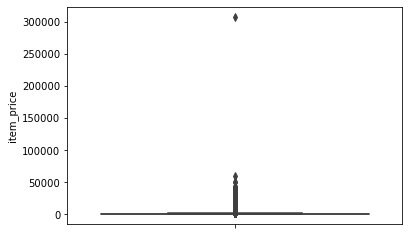

In [20]:
sns.boxplot(y = 'item_price', data = train)

##### 그룹화

In [23]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'}) 
# data_block_num 기준으로 그룹화해 item_cnt_day 피처 값의 합을 구함
# 기준 피처(date_block_num)에 따라 집계 피처(item_cnt_day) 분리 -> 집계함수를 적용해 집곗값 계산
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


##### 월별 판매량

[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

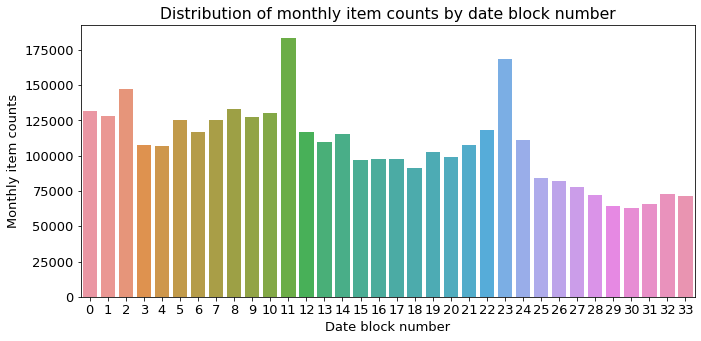

In [26]:
mpl.rc('font', size = 13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month_sum = group_month_sum.reset_index()

# 월별 총 상품 판매량 막대 그래프
sns.barplot(x = 'date_block_num', y = 'item_cnt_day', data = group_month_sum)

ax.set(title = 'Distribution of monthly item counts by date block number',
       xlabel = 'Date block number',
       ylabel = 'Monthly item counts')

- 11 : 2013년 12월 
- 23 : 2014년 12월
- 연말에 판매량이 급증한 것으로 확인 가능

##### 상품분류별 판매량

In [27]:
train['item_category_id'].nunique()

84

In [28]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


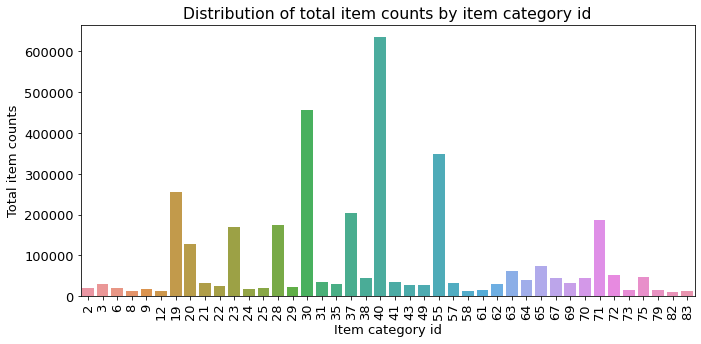

In [38]:
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 고윳값이 84개로 많아, 판매량이 10,000개를 초과하는 상품분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

sns.barplot(x = 'item_category_id', y = 'item_cnt_day', data = group_cat_sum)
ax.set(title = 'Distribution of total item counts by item category id',
       xlabel = 'Item category id',
       ylabel = 'Total item counts')
ax.tick_params(axis = 'x', labelrotation = 90)

- 40 > 30 > 55 순

##### 상점별 판매량

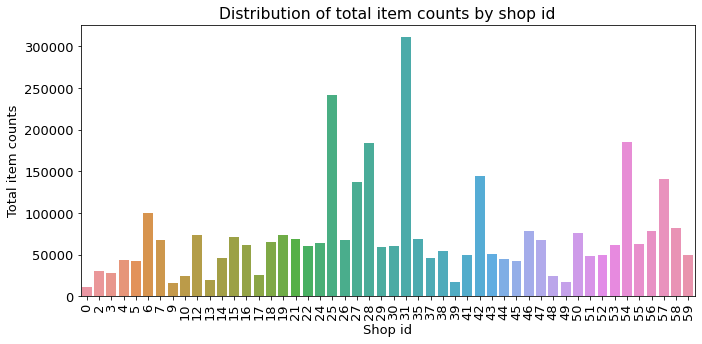

In [37]:
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

sns.barplot(x = 'shop_id', y = 'item_cnt_day', data = group_shop_sum)
ax.set(title = 'Distribution of total item counts by shop id',
       xlabel = 'Shop id',
       ylabel = 'Total item counts')
ax.tick_params(axis = 'x', labelrotation = 90)

- 31 > 25 순

### 9.3 베이스라인 모델

In [39]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action = 'ignore') # 경고 문구 생략 

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

#### 9.3.1 피처 엔지니어링 1 : 피처명 한글화

In [40]:
sales_train = sales_train.rename(columns = {'date': '날짜',
                                            'date_block_num': '월ID',
                                            'shop_id': '상점ID',
                                            'item_id': '상품ID',
                                            'item_price': '판매가',
                                            'item_cnt_day': '판매량'})

sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [41]:
shops = shops.rename(columns = {'shop_name': '상점명',
                                'shop_id': '상점ID'})

shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [43]:
items = items.rename(columns = {'item_name': '상품명',
                                'item_id': '상품ID',
                                'item_category_id': '상품분류ID'})

items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [44]:
item_categories = item_categories.rename(columns = {'item_category_name': '상품분류명',
                                                    'item_category_id': '상품분류ID'})

item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [45]:
test = test.rename(columns = {'shop_id': '상점ID',
                              'item_id': '상품ID'})

test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


#### 9.3.2 피처 엔지니어링 2 : 데이터 다운캐스팅
- 다운캐스팅(downcasting) : 더 작은 데이터 타입으로 변환하는 작업
- 다운캐스팅을 통해 메모리 낭비를 막고 훈련 속도를 빠르게 할 수 있음

In [46]:
def downcast(df, verbose = True):
    start_mem = df.memory_usage().sum() / 1024 ** 2 # MB 단위

    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all(): # 정수형 또는 실수형 타입 중 소수점 첫째자리에서 반올림한 수가 원래 수와 같다면(1.0 등)
            df[col] = pd.to_numeric(df[col], downcast = 'integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast = 'float')
    
    end_mem = df.memory_usage().sum() / 1024 ** 2

    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [58]:
all_df = [sales_train, shops, items, item_categories, test]

for df in all_df:
    df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


#### 9.3.3 피처 엔지니어링 3: 데이터 조합 생성
- 월ID 별 한번이라도 등장한 상점ID, 상품ID가 있다면 월ID, 상점ID, 상품ID의 조합을 생성(판매량 0으로라도 생성)

In [63]:
from itertools import product

train = []

# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID'] == i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID'] == i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID']

train = pd.DataFrame(np.vstack(train), columns = idx_features)

In [62]:
from itertools import product
np.array(list(product([0], sales_train.loc[sales_train['월ID'] == 0, '상점ID'].unique(), sales_train.loc[sales_train['월ID'] == 0, '상품ID'].unique())))

array([[    0,    59, 22154],
       [    0,    59,  2552],
       [    0,    59,  2554],
       ...,
       [    0,    45,   628],
       [    0,    45,   631],
       [    0,    45,   621]])

In [64]:
train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


#### 9.3.4 피처 엔지니어링 4 : 타깃값(월간 판매량) 추가

In [67]:
# idx_features를 기준으로 그룹화해 판매량 합 구하기
group = sales_train.groupby(idx_features).agg({'판매량': 'sum'})

group = group.reset_index()
group = group.rename(columns = {'판매량': '월간 판매량'})
group

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [68]:
# train과 group 병합
train = train.merge(group, how = 'left', on = idx_features)
train # 결측값 추후 0으로 대체 필요

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


##### 가비지 컬렉션 
- 가비지 컬렉션(garbage collection) : 할당한 메모리 중 더는 사용하지 않는 영역을 해제하는 기능
- group 데이터는 더이상 필요하지 않으므로 메모리 절약 차원에서 가비지 컬렉션 수행

In [69]:
import gc 

del group
gc.collect()

13484

#### 9.3.5 피처 엔지니어링 5: 테스트 데이터 이어붙이기

In [71]:
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [72]:
test['월ID'] = 34 # test 데이터에 존재하지 않는 월ID 추가

In [73]:
all_data = pd.concat([train, test.drop('ID', axis = 1)], # 테스트 데이터 중 인덱스 역할을 하는 ID 컬럼 제외한 후 train 데이터와 합쳐줌
                     ignore_index = True,
                     keys = idx_features) # 이어붙이는 기준이 되는 피처 

In [74]:
# 결측값 0으로 대체
all_data = all_data.fillna(0)

all_data

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


#### 9.3.6 피처 엔지니어링 6 : 나머지 데이터 병합(최종 데이터 생성)
- shops, items, item_categories 데이터를 all_data에 병합

In [75]:
all_data = all_data.merge(shops, how = 'left', on = '상점ID')
all_data = all_data.merge(items, how = 'left', on = '상품ID')
all_data = all_data.merge(item_categories, how = 'left', on = '상품분류ID')

# 데이터 다운캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션
del shops, items, item_categories
gc.collect()

26.4% 압축됨


446

In [76]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상점명,상품명,상품분류ID,상품분류명
0,0,59,22154,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,59,2552,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,0,59,2554,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,0,59,2555,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,0,59,2564,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео


In [77]:
# 상점명, 상품명, 상품분류명 제거
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis = 1)

In [78]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상품분류ID
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59


#### 9.3.7 피처 엔지니어링 7 : 마무리
- all_data를 이용해 훈련, 검증, 테스트 데이터 분리
    - 훈련 데이터 : 2013.01 ~ 2015.09(월ID : 32) 판매내역
    - 검증 데이터 : 2015.10(월ID : 33) 판매내역
    - 테스트 데이터 : 2015.11(월ID : 34) 판매내역

In [79]:
# 훈련 데이터 
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis = 1)

y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
y_train = y_train.clip(0, 20) # 타깃값을 0 ~ 20으로 제한


# 검증 데이터 
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis = 1)

y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0, 20) # 타깃값을 0 ~ 20으로 제한


# 테스트 데이터 
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis = 1)

In [80]:
del all_data
gc.collect()

243

#### 9.3.8 모델 훈련 및 성능 검증
- 베이스라인 모델로 LightGBM 사용
- 고윳값 개수가 너무 많은 범주형 데이터인 상품ID는 범주형 데이터로 취급하지 않음(모델 성능을 위해)

In [81]:
import lightgbm as lgb

params = {'metric' : 'rmse',
          'num_leaves' : 255,
          'learning_rate' : 0.01,
          'force_col_wise' : True,
          'random_state' : 10}

cat_features = ['상점ID', '상품분류ID']

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

In [82]:
lgb_model = lgb.train(params = params,
                      train_set = dtrain,
                      num_boost_round = 500,
                      valid_sets = (dtrain, dvalid),
                      categorical_feature = cat_features,
                      verbose_eval = 50)

[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.1478	valid_1's rmse: 1.06808
[100]	training's rmse: 1.11378	valid_1's rmse: 1.03754
[150]	training's rmse: 1.09616	valid_1's rmse: 1.02483
[200]	training's rmse: 1.08478	valid_1's rmse: 1.01789
[250]	training's rmse: 1.07631	valid_1's rmse: 1.01369
[300]	training's rmse: 1.06928	valid_1's rmse: 1.00976
[350]	training's rmse: 1.06362	valid_1's rmse: 1.00754
[400]	training's rmse: 1.05729	valid_1's rmse: 1.00543
[450]	training's rmse: 1.05223	valid_1's rmse: 1.00397
[500]	training's rmse: 1.04798	valid_1's rmse: 1.00336


In [ ]:
# 위 처럼 categorical_feature에 아무 값도 전달하지 않으면 category 타입인 데이터를 범주형 데이터로 인식
# 아래와 같이 미리 category 타입으로 바꾸면 categorical_feature에 값을 전달하지 않아도 모델 훈련 결과가 같음
cat_features = ['상점ID', '상품분류ID']
for cat_feature in cat_features:
    all_data[cat_feature] = all_data[cat_feature].astype('category')

#### 9.3.9 예측 및 결과 제출

In [83]:
preds = lgb_model.predict(X_test).clip(0, 20) # 타깃값은 0 ~ 20 사이어야 함

In [84]:
preds

array([0.56284896, 0.35987326, 0.43199772, ..., 0.11819723, 0.09987982,
       0.0876757 ])

In [86]:
submission['item_cnt_month'] = preds
submission.to_csv(data_path + 'submission1.csv', index = False)

### 9.4 성능 개선
- 모델은 그대로 lightGBM 사용
- 피처 엔지니어링 수행

In [87]:
import pandas as pd

data_path = 'C:/Users/hyebin.hyebin/Desktop/python/kaggle_dataset/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

#### 9.4.1 피처 엔지니어링 1 : 피처명 한글화와 데이터 다운캐스팅

In [88]:
sales_train = sales_train.rename(columns = {'date': '날짜',
                                            'date_block_num': '월ID',
                                            'shop_id': '상점ID',
                                            'item_id': '상품ID',
                                            'item_price': '판매가',
                                            'item_cnt_day': '판매량'})


shops = shops.rename(columns = {'shop_name': '상점명',
                                'shop_id': '상점ID'})


items = items.rename(columns = {'item_name': '상품명',
                                'item_id': '상품ID',
                                'item_category_id': '상품분류ID'})


item_categories = item_categories.rename(columns = {'item_category_name': '상품분류명',
                                                    'item_category_id': '상품분류ID'})


test = test.rename(columns = {'shop_id': '상점ID',
                              'item_id': '상품ID'})

In [89]:
def downcast(df, verbose = True):
    start_mem = df.memory_usage().sum() / 1024 ** 2 # MB 단위

    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all(): # 정수형 또는 실수형 타입 중 소수점 첫째자리에서 반올림한 수가 원래 수와 같다면(1.0 등)
            df[col] = pd.to_numeric(df[col], downcast = 'integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast = 'float')
    
    end_mem = df.memory_usage().sum() / 1024 ** 2

    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))

    return df


all_df = [sales_train, shops, items, item_categories, test]

for df in all_df:
    df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


##### 9.4.2 피처 엔지니어링 2 : 개별 데이터 피처 엔지니어링
##### sales_train 이상치 제거 및 전처리
- 판매가, 판매량이 음수인 데이터는 이상치로 간주
- 판매가가 50,000 이상인 데이터, 판매량이 1,000 이상인 데이터도 이상치로 간주

In [90]:
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.000000,1
1,03.01.2013,0,25,2552,899.000000,1
2,05.01.2013,0,25,2552,899.000000,-1
3,06.01.2013,0,25,2554,1709.050049,1
4,15.01.2013,0,25,2555,1099.000000,1


In [91]:
sales_train = sales_train[sales_train['판매가'] > 0]
sales_train = sales_train[sales_train['판매가'] < 5000]

sales_train = sales_train[sales_train['판매량'] > 0]
sales_train = sales_train[sales_train['판매량'] < 1000]

In [92]:
# 유사해보이는 상점명 동일하게 맞추기

print(shops['상점명'][0], '||', shops['상점명'][57])
print(shops['상점명'][1], '||', shops['상점명'][58])
print(shops['상점명'][10], '||', shops['상점명'][11])
print(shops['상점명'][39], '||', shops['상점명'][40])

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [93]:
sales_train.loc[sales_train['상점ID'] == 0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID'] == 1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID'] == 10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID'] == 39, '상점ID'] = 40

test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40

##### shops 파생 피처 생성 및 인코딩
- 상점명 첫 단어는 도시로 확인
- 상점명을 이용해 도시 피처 생성

In [96]:
shops['도시'] = shops['상점명'].apply(lambda x: x.split()[0]) # 공백 기준으로 나눈 뒤 첫 단어 -> 도시명

In [97]:
shops['도시'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [99]:
shops.loc[shops['도시'] == '!Якутск', '도시'] = 'Якутск' # 느낌표는 잘못 기재된 것으로 고려

In [100]:
# 레이블 인코딩 수행 -> 트리 기반 모델은 레이블 인코딩을 사용해도 무방
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
shops['도시'] = label_encoder.fit_transform(shops['도시'])

In [103]:
shops = shops.drop('상점명', axis = 1)
shops.head()

,상점ID,도시
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


##### items 파생 피처 생성
- 첫 판매월 피처 생성

In [104]:
items = items.drop(['상품명'], axis = 1)

In [108]:
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID': 'min'})['월ID']
items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [109]:
items[items['첫 판매월'].isna()] # 결측값은 해당 상품이 한번도 판매된 적이 없음을 의미

,상품ID,상품분류ID,첫 판매월
39,39,41,NaN
83,83,40,NaN
102,102,76,NaN
103,103,76,NaN
140,140,45,NaN
...,...,...,...
21975,21975,61,NaN
21993,21993,62,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [110]:
# 첫 판매월의 결측치는 34(훈련 데이터의 마지막 월인 2015.10 보다 큰 2015.11 의미)로 대체

items['첫 판매월'] = items['첫 판매월'].fillna(34)

##### item_categories 파생 피처 생성 및 인코딩
- '대분류'라는 파생 피처를 만들고 인코딩
- 상품 분류명의 첫 단어가 범주 대분류 의미

In [112]:
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x: x.split()[0])

In [113]:
item_categories['대분류'].unique()

array(['PC', 'Аксессуары', 'Билеты', 'Доставка', 'Игровые', 'Игры',
       'Карты', 'Кино', 'Книги', 'Музыка', 'Подарки', 'Программы',
       'Служебные', 'Чистые', 'Элементы'], dtype=object)

In [115]:
item_categories['대분류'].value_counts()

Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Программы      6
Музыка         6
Карты          5
Кино           5
Служебные      2
Чистые         2
Доставка       1
PC             1
Элементы       1
Билеты         1
Name: 대분류, dtype: int64

In [118]:
# 고윳값이 5개 미만인 대분류는 모두 'etc'로 변경
def make_etc(x):
    if len(item_categories[item_categories['대분류'] == x]) >= 5: 
        return x
    else:
        return 'etc'
    
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)

In [119]:
item_categories.head()

,상품분류명,상품분류ID,대분류
0,PC - Гарнитуры/Наушники,0,etc
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [120]:
label_encoder = LabelEncoder()

item_categories['대분류'] = label_encoder.fit_transform(item_categories['대분류'])

item_categories = item_categories.drop('상품분류명', axis = 1)

In [121]:
item_categories.head()

,상품분류ID,대분류
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


#### 9.4.3 피처 엔지니어링 3 : 데이터 조합 및 파생 피처 생성
##### 데이터 조합

In [122]:
from itertools import product

train = []

# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID'] == i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID'] == i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))

idx_features = ['월ID', '상점ID', '상품ID']

train = pd.DataFrame(np.vstack(train), columns = idx_features)

##### 파생 피처 생성
- 월간 판매량, 평균 판매가 생성

In [123]:
train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10702547,33,21,7635
10702548,33,21,7638
10702549,33,21,7640
10702550,33,21,7632


In [124]:
group = sales_train.groupby(idx_features).agg({'판매량' : 'sum',
                                               '판매가' : 'mean'})

group = group.reset_index()
group = group.rename(columns = {'판매량' : '월간 판매량', '판매가' : '평균 판매가'})

group

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,2,27,1,2499.0
1,0,2,33,1,499.0
2,0,2,317,1,299.0
3,0,2,438,1,299.0
4,0,2,471,2,399.0
...,...,...,...,...,...
1589899,33,59,22087,6,119.0
1589900,33,59,22088,2,119.0
1589901,33,59,22091,1,179.0
1589902,33,59,22100,1,629.0


In [125]:
train = train.merge(group, on = idx_features, how = 'left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [131]:
# 기준 피처 별 상품 판매건수 - 당일에 1번이라도 판매했다면 건수가 1건, 판매하지 못했다면 0건

group = sales_train.groupby(idx_features).agg({'판매량' : 'count'})
group = group.reset_index()
group = group.rename(columns = {'판매량' : '판매건수'})

train = train.merge(group, on = idx_features, how = 'left')

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,NaN,NaN,NaN
2,0,59,2554,NaN,NaN,NaN
3,0,59,2555,NaN,NaN,NaN
4,0,59,2564,NaN,NaN,NaN
